In [31]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

In [32]:
main = pd.read_csv("C:/Users/gebruiker/Desktop/dissertation/marketing_campaign.csv", sep='\t')
main.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [33]:
main.shape

(2240, 29)

In [34]:
# 3 feature are not numerical
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [35]:
main.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [36]:
main.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [37]:
main.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [38]:
# Dropping columns because they have equal amount for all records and would not have any impact on our models

df=main.drop(columns=['Z_Revenue','Z_CostContact'],axis=1)


In [39]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [40]:
df.shape

(2240, 27)

In [41]:
# replcaing the null amount of income with groupby equivalent of their education

df["Income"] = df.groupby("Education")['Income'].transform(lambda x: x.fillna(x.mean()))

In [42]:
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
dtype: bool

<AxesSubplot:>

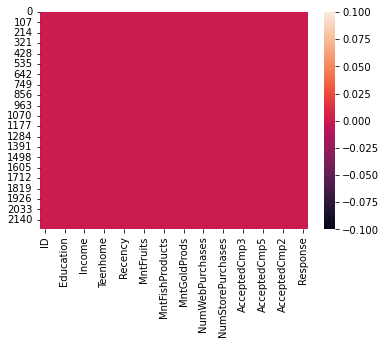

In [43]:
sns.heatmap(df.isnull())

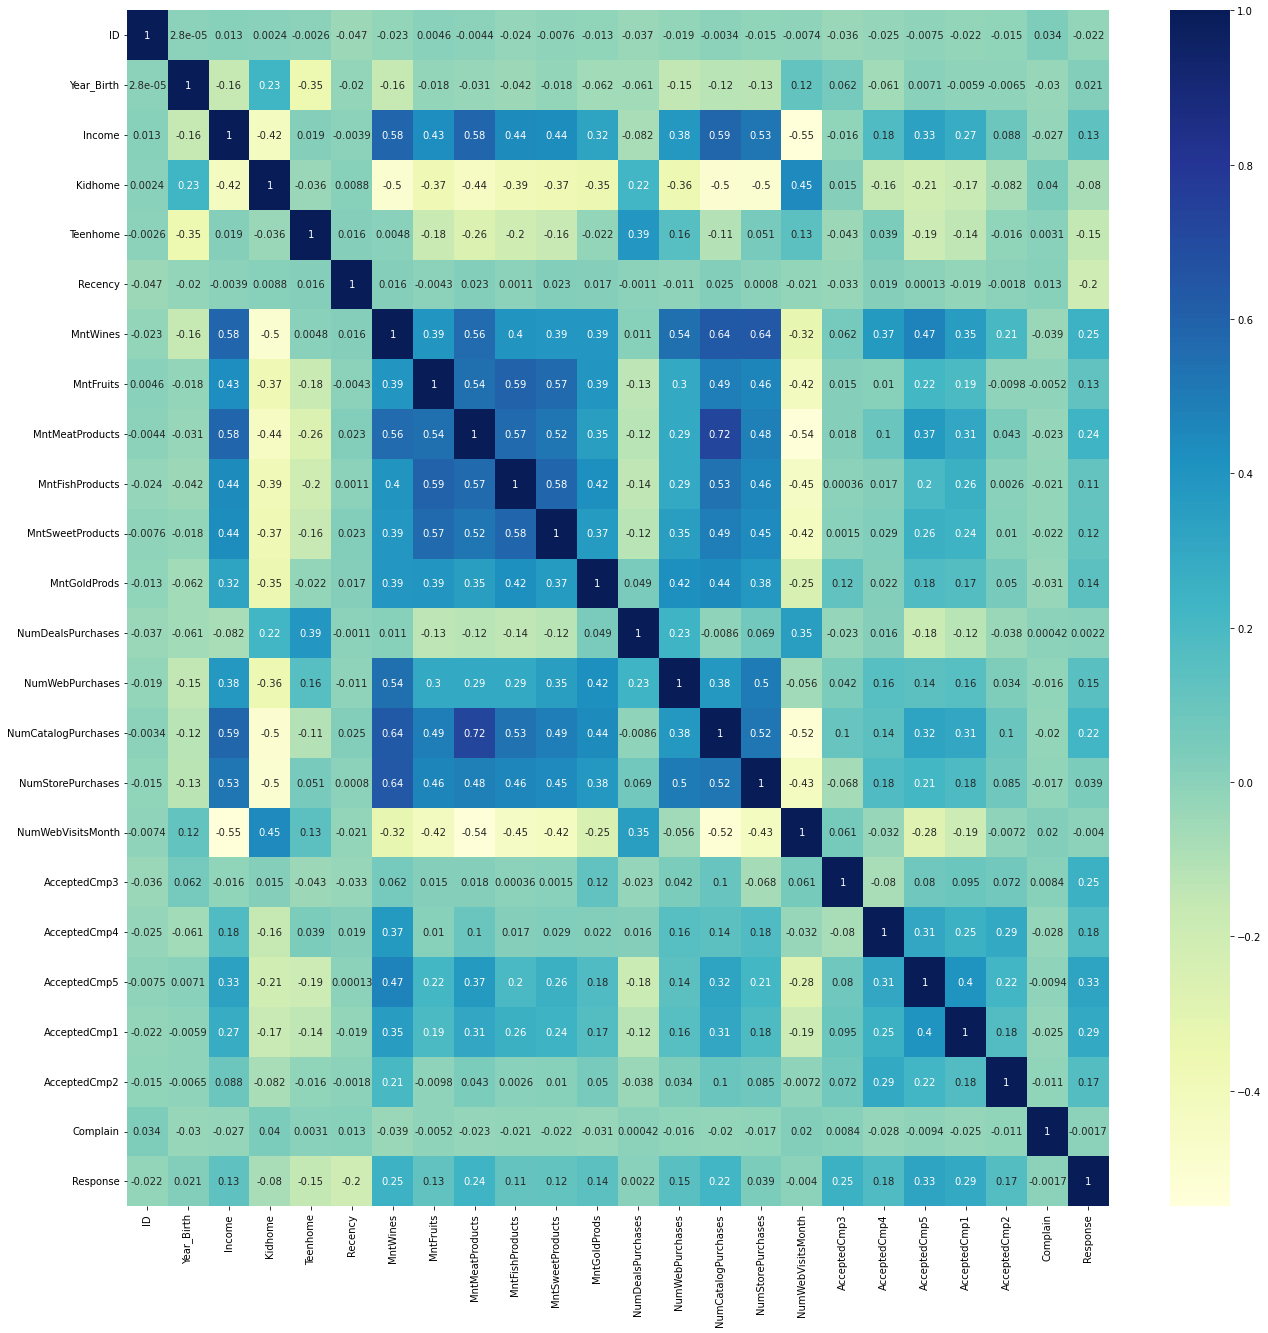

In [44]:
# Finding the correlation between the feature column

plt.figure(figsize=(22,22))
sns.heatmap(df.corr(), annot=True , cmap='YlGnBu')
plt.show()

In [45]:
#using unstacking data for better analysis

c1 = df.corr().abs().unstack()
c1.sort_values(ascending = False)[24:60:2]

MntMeatProducts      NumCatalogPurchases    0.723827
NumStorePurchases    MntWines               0.642100
MntWines             NumCatalogPurchases    0.635226
MntFishProducts      MntFruits              0.594804
Income               NumCatalogPurchases    0.586743
MntSweetProducts     MntFishProducts        0.579870
Income               MntMeatProducts        0.577160
                     MntWines               0.576780
MntFishProducts      MntMeatProducts        0.568402
MntSweetProducts     MntFruits              0.567164
MntMeatProducts      MntWines               0.562667
Income               NumWebVisitsMonth      0.549709
MntMeatProducts      MntFruits              0.543105
NumWebPurchases      MntWines               0.542265
MntMeatProducts      NumWebVisitsMonth      0.539470
NumCatalogPurchases  MntFishProducts        0.534478
NumStorePurchases    Income                 0.526647
MntMeatProducts      MntSweetProducts       0.523846
dtype: float64

In [46]:
df['Marital_Status'].value_counts()  

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [47]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'Couple')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [48]:
df['Marital_Status'].value_counts()  

Couple    1444
Single     796
Name: Marital_Status, dtype: int64

In [49]:
df['Children'] = df['Kidhome'] + df['Teenhome']

In [50]:
df=df.drop(columns=['Kidhome','Teenhome'],axis=1)

In [51]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [52]:
df['Education'] = df['Education'].replace(['PhD', 'Master','2n Cycle'],'PostGraduate')  
df['Education'] = df['Education'].replace(['Graduation'], 'Graduate')
df['Education'] = df['Education'].replace(['Basic'],'UnderGraduate')  


In [53]:
df['Education'].value_counts()

Graduate         1127
PostGraduate     1059
UnderGraduate      54
Name: Education, dtype: int64

In [54]:
# Replcaing "Age" coloumn to year_birth coloumn in the dataframe

df['Age'] = 2023 - df["Year_Birth"]
df=df.drop(columns=["Year_Birth"],axis=1)

In [55]:
# Time that Customer has been enrolled
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer)
df['Date_Collected'] = '01-01-2015'
df['Date_Collected'] = pd.to_datetime(df.Date_Collected)
df['Time_Enrolled_Days'] = (df['Date_Collected'] - df['Dt_Customer']).dt.days
df=df.drop(columns=['Dt_Customer','Date_Collected'],axis=1)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2240 non-null   float64
 4   Recency              2240 non-null   int64  
 5   MntWines             2240 non-null   int64  
 6   MntFruits            2240 non-null   int64  
 7   MntMeatProducts      2240 non-null   int64  
 8   MntFishProducts      2240 non-null   int64  
 9   MntSweetProducts     2240 non-null   int64  
 10  MntGoldProds         2240 non-null   int64  
 11  NumDealsPurchases    2240 non-null   int64  
 12  NumWebPurchases      2240 non-null   int64  
 13  NumCatalogPurchases  2240 non-null   int64  
 14  NumStorePurchases    2240 non-null   int64  
 15  NumWebVisitsMonth    2240 non-null   i

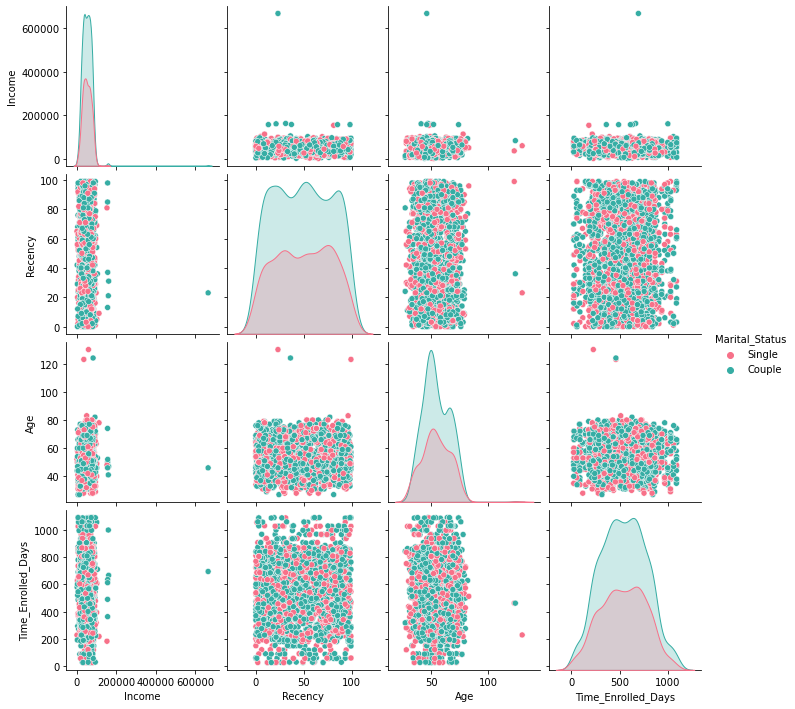

In [57]:
to_plot = ['Income', 'Recency', 'Age', 'Time_Enrolled_Days', 'Marital_Status']
sns.pairplot(df[to_plot], hue='Marital_Status', palette='husl')
plt.show()

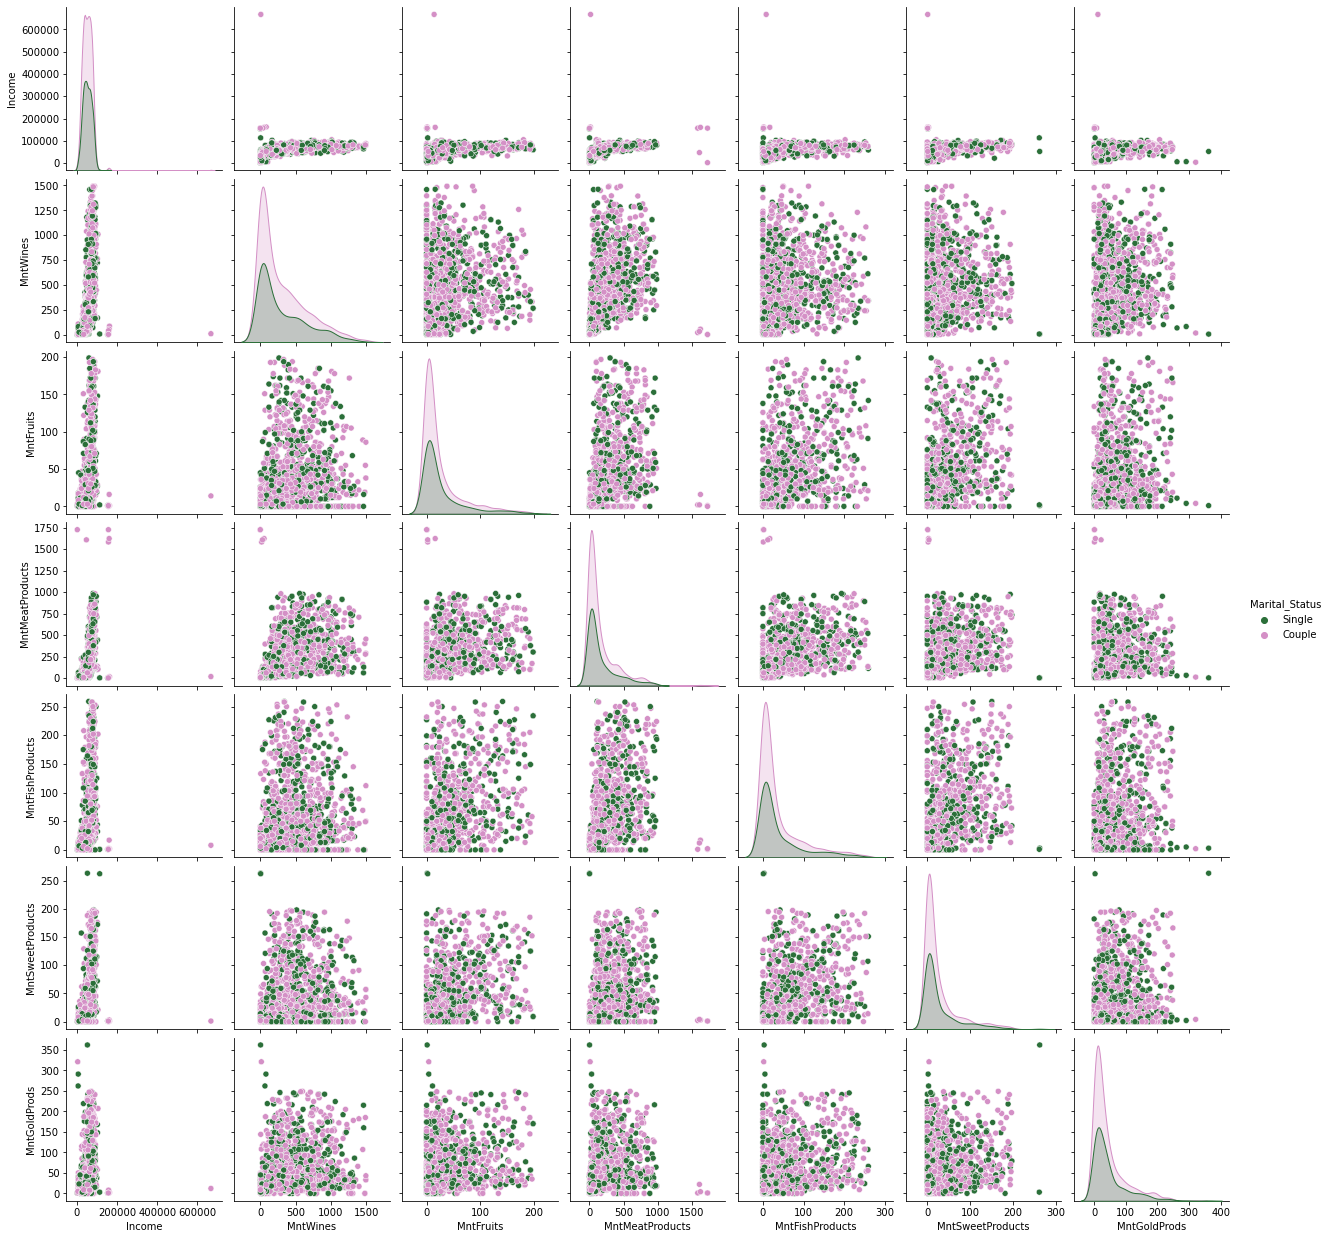

In [58]:
to_plot = ['Income', "MntWines","MntFruits","MntMeatProducts" ,"MntFishProducts" ,"MntSweetProducts",
           "MntGoldProds", 'Marital_Status']
sns.pairplot(df[to_plot], hue='Marital_Status', palette='cubehelix')
plt.show()

In [ ]:
to_plot = ['Income',"NumDealsPurchases","NumWebPurchases","NumCatalogPurchases" , "NumStorePurchases" ,
           "NumWebVisitsMonth", 'Marital_Status']
sns.pairplot(df[to_plot], hue='Income', palette='bright')
plt.show()